In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

### Load dataset

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


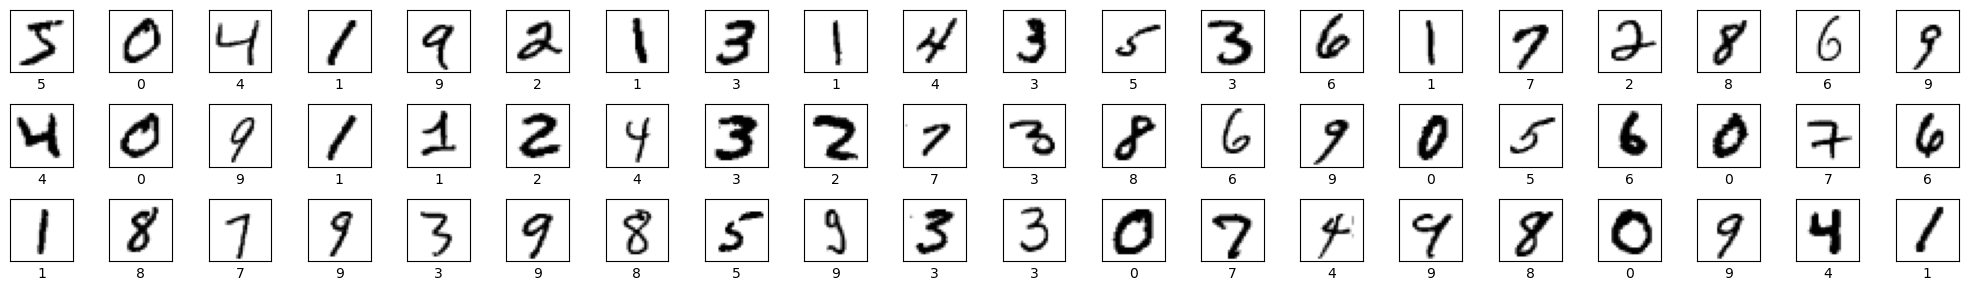

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 


### Normalise data

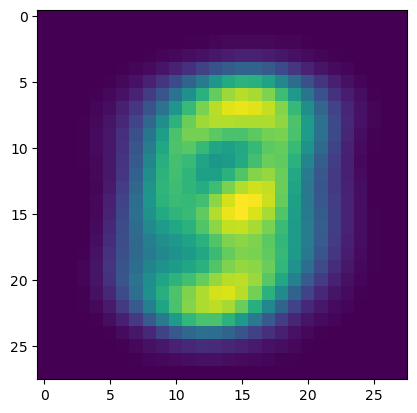

In [6]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [8]:
X_train_norm, X_test_norm = X_train-mean_img, X_test-mean_img

In [33]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 24, 24, 32)        2432      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_90 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_67 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                     

In [34]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h = model.fit(x=X_train_norm, y=Y_train, epochs=5, validation_split=0.3, batch_size=32)


Epoch 1/5


ValueError: in user code:

    File "C:\Users\Safin\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Safin\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Safin\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Safin\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Safin\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Safin\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_16' (type Sequential).
    
    Input 0 of layer "conv2d_66" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)
    
    Call arguments received by layer 'sequential_16' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
      • training=True
      • mask=None


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h = model.fit(x=X_train_norm, y=Y_train, epochs=5, validation_split=0.3, batch_size=32)


In [ ]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h = model.fit(x=X_train_norm, y=Y_train, epochs=5, validation_split=0.3, batch_size=32)
